## Text classification on LeMonde2003 Dataset

In this notebook, we
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*.

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory :

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ?
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [1]:
import pandas as pd

# load dataframe from CSV file
df = pd.read_csv('data/LeMonde2003_9classes.csv')


<Axes: xlabel='count', ylabel='category'>

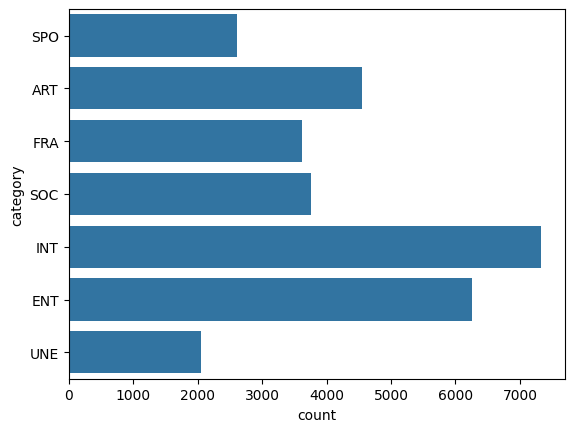

In [2]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
sns.countplot(data=df,y='category')

In [3]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
df.sample(5)

text  \
6736                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

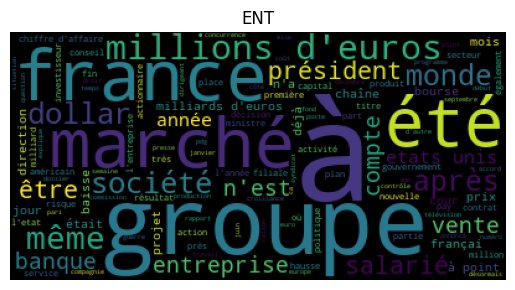

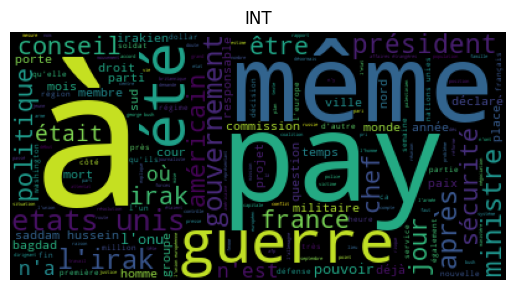

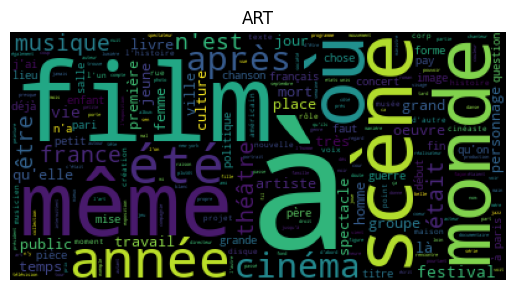

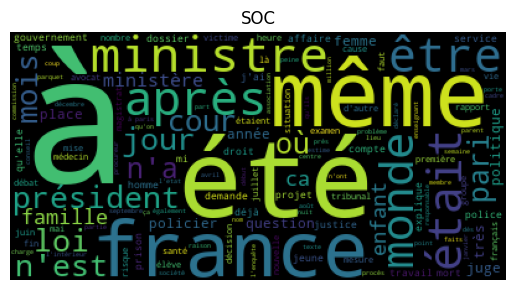

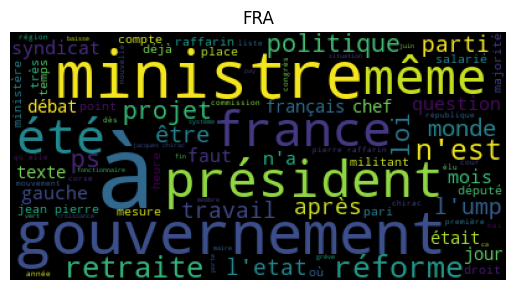

In [4]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
  plt.imshow(WordCloud(stopwords=STOPWORDS).generate(' '.join(df[df['category']==cat]['text'])))
  plt.axis('off')
  plt.title(cat)
  plt.show()


## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple :

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words :

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words.
> * Train a naive bayes classifier on the data.
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method.

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [5]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set, dev_set = train_test_split(train_set, test_size=0.5, random_state=42)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# create the vectorizer object
vectorizer = CountVectorizer(max_features=1000)
# fit on train data
vectorizer.fit(train_set['text'])
# apply it on train and dev data
train_counts = vectorizer.transform(train_set["text"])
dev_counts = vectorizer.transform(dev_set["text"])


In [7]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# create the MultinomialNB
NB = MultinomialNB()
# Train
NB.fit(train_counts, train_set['category'])
# Evaluate
score_train = NB.score(train_counts, train_set['category'])
score_dev = NB.score(dev_counts, dev_set['category'])
score_test = NB.score(vectorizer.transform(test_set["text"]), test_set['category'])
print(f'Train accuracy: {score_train}')
print(f'Dev accuracy: {score_dev}')
print(f'Test accuracy: {score_test}')

Train accuracy: 0.7405934029504393
Dev accuracy: 0.71730482347091
Test accuracy: 0.7241836565556108


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)

**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE
tf_transformer = TfidfTransformer().fit(train_counts)
train_tf = tf_transformer.transform(train_counts)
dev_tf = tf_transformer.transform(dev_counts)
BN2 = MultinomialNB()
BN2.fit(train_tf, train_set['category'])
score_train = BN2.score(train_tf, train_set['category'])
score_dev = BN2.score(dev_tf, dev_set['category'])
score_test = BN2.score(tf_transformer.transform(vectorizer.transform(test_set["text"])), test_set['category'])
print(f'Train accuracy: {score_train}')
print(f'Dev accuracy: {score_dev}')
print(f'Test accuracy: {score_test}')


Train accuracy: 0.7481352560914968
Dev accuracy: 0.7340460798939168
Test accuracy: 0.7351234874854964


## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used :

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


              precision    recall  f1-score   support

         ART       0.54      0.92      0.68       919
         ENT       0.82      0.75      0.78      1201
         FRA       0.63      0.64      0.63       737
         INT       0.81      0.78      0.80      1491
         SOC       0.60      0.60      0.60       741
         SPO       0.88      0.71      0.79       548
         UNE       0.14      0.01      0.01       396

    accuracy                           0.70      6033
   macro avg       0.63      0.63      0.61      6033
weighted avg       0.69      0.70      0.68      6033



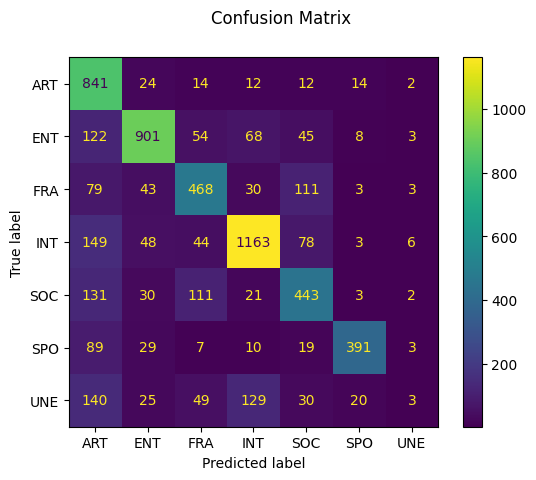

In [9]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# YOUR CODE HERE
cr_test = classification_report(test_set['category'], BN2.predict(vectorizer.transform(test_set["text"])))
print(cr_test)
cm_test = ConfusionMatrixDisplay.from_estimator(BN2, vectorizer.transform(test_set["text"]), test_set['category'])
cm_test.figure_.suptitle("Confusion Matrix")
plt.show()



The classes with the best scores are the categories ENT and INT. This is because these categories have the largest supports.

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

Train accuracy: 0.8030949839914621
Dev accuracy: 0.7885983635716827
Test accuracy: 0.791889007470651
              precision    recall  f1-score   support

         ART       0.79      0.87      0.83       917
         ENT       0.78      0.84      0.81      1251
         FRA       0.71      0.67      0.69       730
         INT       0.82      0.89      0.86      1515
         SOC       0.72      0.57      0.63       726
         SPO       0.98      0.71      0.83       483

    accuracy                           0.79      5622
   macro avg       0.80      0.76      0.77      5622
weighted avg       0.79      0.79      0.79      5622



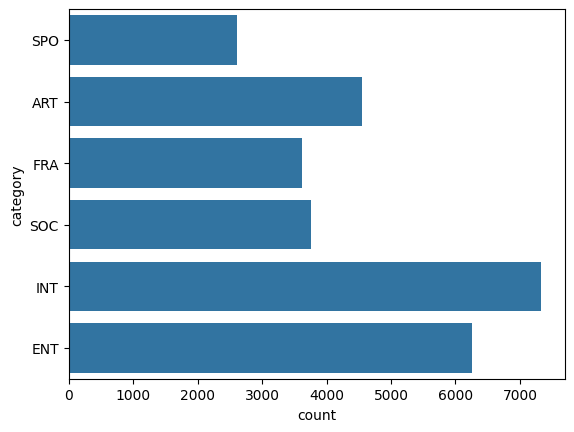

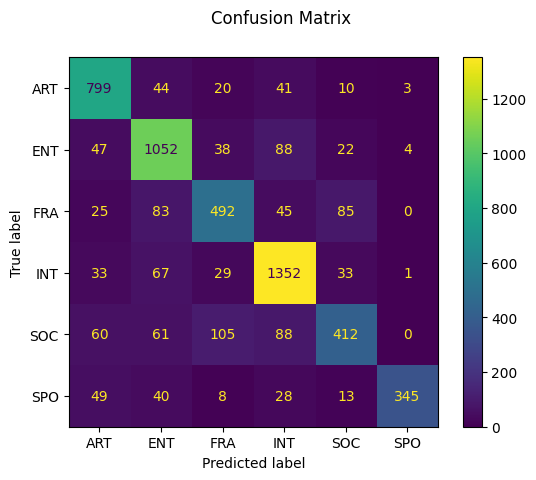

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class
df = df[df['category'] != 'UNE']

# Plot the statistics of classes
sns.countplot(data=df,y='category')

# Make the splits and print the sizes for checking
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set, dev_set = train_test_split(train_set, test_size=0.5, random_state=42)

# Apply TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
vectorizer.fit(train_set['text'])
train_counts = vectorizer.transform(train_set["text"])
dev_counts = vectorizer.transform(dev_set["text"])

# Train MultinomialNB
NB = MultinomialNB()
NB.fit(train_counts, train_set['category'])

# Evaluate
score_train = NB.score(train_counts, train_set['category'])
score_dev = NB.score(dev_counts, dev_set['category'])
score_test = NB.score(vectorizer.transform(test_set["text"]), test_set['category'])
print(f'Train accuracy: {score_train}')
print(f'Dev accuracy: {score_dev}')
print(f'Test accuracy: {score_test}')

# Print accuracy
cr_test = classification_report(test_set['category'], NB.predict(vectorizer.transform(test_set["text"])))
print(cr_test)

# Print confusion matric
cm_test = ConfusionMatrixDisplay.from_estimator(NB, vectorizer.transform(test_set["text"]), test_set['category'])
cm_test.figure_.suptitle("Confusion Matrix")
plt.show()


## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification).

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model
* start testing with a small number of articles and the first 100's of characters for faster experiments.

In [17]:
from transformers import pipeline
import time
import pandas as pd
from tqdm import tqdm  # For progress tracking

# Initialize
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Candidate labels (descriptive names)
candidate_labels = [
    "Politics", "International", "Arts & Culture", "Society",
    "France", "Sports", "Books", "Television"
]

# Test the model on one example
example_text = df["text"].iloc[0][:1000].strip()  # Limit to 1000 characters
example_category = df["category"].iloc[0].strip()

start_time = time.time()
result = classifier(example_text, candidate_labels)
end_time = time.time()

predicted_label = result["labels"][0]

print("Example Text:", example_text[:200])
print("Predicted Class:", predicted_label)
print("True Class:", example_category)
print(f"Processing time: {end_time - start_time:.4f} seconds")

# Evaluate on 100 articles
test_set = df.sample(100, random_state=42).dropna(subset=["text", "category"])  # Ensure no missing values
total_time = 0
correct_predictions = 0

for index, row in tqdm(test_set.iterrows(), total=len(test_set), desc="Processing Articles"):
    text = row["text"][:1000].strip()
    true_label = row["category"].strip()

    start_time = time.time()
    result = classifier(text, candidate_labels)
    end_time = time.time()

    total_time += (end_time - start_time)

    predicted_label = result["labels"][0]
    if predicted_label.lower() == true_label.lower():
        correct_predictions += 1

# Compute accuracy
accuracy = correct_predictions / len(test_set)

print(f"\nAccuracy on 100 articles: {accuracy:.4f}")
print(f"Total processing time for 100 articles: {total_time:.4f} seconds")
print(f"Average processing time per article: {total_time/len(test_set):.4f} seconds")
print(f"Model used: facebook/bart-large-mnli")



RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.